# Britain data exploration 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme(style="whitegrid")
energy_table = pd.read_csv('../BDD/energy.csv', sep=';')
energy_table = energy_table[energy_table.Code=='GBR']
gdp_table = pd.read_csv('../BDD/UK/GDP-per-capita-in-the-uk-since-1270.csv')
gdp_table.drop('Entity', axis=1, inplace=True)
gdp_table.drop('Code', axis=1, inplace=True)

pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='GBR']
UK_table = pd.merge(gdp_table, pop_table, on=['Year'])
UK_table = pd.merge(UK_table, energy_table, on=['Year'])
UK_table.head()

,Year,Real GDP per capita,Entity_x,Code_x,"Total population (Gapminder, HYDE & UN)",Entity_y,Code_y,Primary energy consumption (TWh)
0,1800,2331.7300,United Kingdom,GBR,12327466,United Kingdom,GBR,159.690958
1,1801,2338.0801,United Kingdom,GBR,12483870,United Kingdom,GBR,160.991428
2,1802,2348.0200,United Kingdom,GBR,12642258,United Kingdom,GBR,162.294965
3,1803,2271.5200,United Kingdom,GBR,12802656,United Kingdom,GBR,163.595435
4,1804,2239.8501,United Kingdom,GBR,12965089,United Kingdom,GBR,164.898972


# Data exploration

## Energy

No handles with labels found to put in legend.


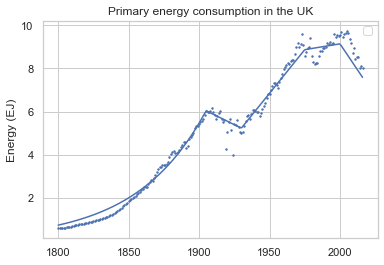

In [2]:
year = UK_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)
pop = UK_table['Total population (Gapminder, HYDE & UN)']
energy = UK_table['Primary energy consumption (TWh)']*3.6
gdp = UK_table['Real GDP per capita ']*pop
plt.scatter(year, 0.001*energy, s=2)
plt.title("Primary energy consumption in the UK")
plt.ylabel("Energy (EJ)")

r, y0 = reg.expReg(year[:20], energy[:20])
y0, r, a,c,e,g,x1,x2,x3,x4 = reg.expLLLL(year, energy, p0 = (1.15*10**-13,  0.02016948382301577, -30,75,10,-90,1905,1930,1975,2000), bounds=[-200, 2100])
plt.plot(yplot, 0.0003*reg.expllll(yplot,1.15*10**-13,  0.02016948382301577, -30,75,10,-90,1905,1930,1975,2000)*3.6)
plt.legend()

In [3]:
ypred=0.0003*reg.expllll(year,1.15*10**-13,  0.02016948382301577, -30,75,10,-90,1905,1930,1975,2000)*3.6
UK_table['Energy(PJ)-Time(Year)'] = ypred

### GDP

(0.0, 2100000000000.0)

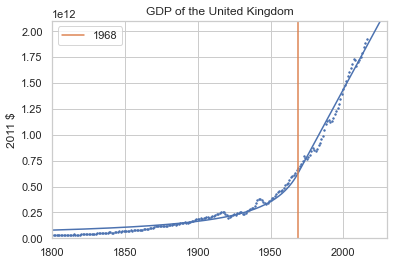

In [4]:
import regressions as reg 
g= gdp/10**12 
yplot = np.linspace(year.min(), year.max()+10, 200)
plt.scatter(year, (10**12)*g, s=2)
plt.title('GDP of the United Kingdom')
# plt.plot(yplot, reg.hyp_lin_lin(yplot,12, 1987, 0.024,0.022, 1968, 2100 ))
b,c,d,f,x1,x2 = reg.hypLinLin(year, g, p0 =(11, 1978, 0.024,0.022, 1959, 2100 ))
plt.plot(yplot, (10**12)*reg.hyp_lin_lin(yplot, b,c,d,f,x1,x2 ))
plt.plot([x1, x1], [0, 2.1*10**12], label = str(int(x1)))
plt.legend()
ypred=  (10**12)*reg.hyp_lin_lin(year, b,c,d,f,x1,x2)
UK_table['GDP(2011$)-Time(year)']= ypred
plt.ylabel('2011 $')
plt.xlim(1800, 2030)
plt.ylim(0, 2.1*(10**12))

(0.1922629228614496, 5.577407535600001, 9.999725341796875, 1.1879868699652076, 2.129730128508592, -0.3739711356125685)
No handles with labels found to put in legend.


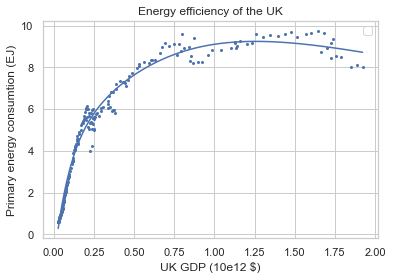

In [5]:
from regressions import sReg, s_model
import numpy as np
e = energy/10**3
g =gdp/10**12
gplot = np.linspace(g.min(), g.max(), 200)
G_i, E_i, A, a1, a2, a3 = sReg(g,e , bounds=[-5, 20])
plt.plot(gplot, s_model(gplot, G_i, E_i, A, a1, a2, a3))
plt.scatter(g,e, s=4)
dist_inf = np.array([abs(g[i]-G_i) for i in range(len(g))])
inflexion_year = year[dist_inf.argmin()]

g_zero = gplot[s_model(gplot, G_i, E_i, A, a1, a2, a3).argmax()]
dist_zer = np.array([abs(g[i]-g_zero) for i in range(len(g))])
zero_year  = year[dist_zer.argmin()]

plt.legend()

plt.xlabel('UK GDP (10e12 $)')
plt.ylabel('Primary energy consumtion (EJ)')
plt.title('Energy efficiency of the UK')
ypred= (10**3)*s_model(g, G_i, E_i, A, a1, a2, a3)
UK_table['Energy(PJ)-GDP(10e12$)'] = ypred*3.6


No handles with labels found to put in legend.


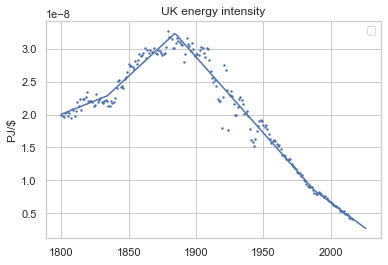

In [6]:
plt.scatter(year, energy/gdp, s= 2)

a,b, c, e, g, x1, x2, x3 = 0.2, 5,  0.3, -0.4, -0.3, 1850, 1890, 1975
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year,energy/gdp*10**8, p0= (a,b, c, e, g, x1, x2, x3 ) )
plt.plot(yplot, reg.llll(yplot, a,b, c, e, g, x1, x2, x3)*(10**-8))

plt.legend()
plt.ylabel("PJ/$")
plt.title("UK energy intensity")
ypred= reg.llll(year, a,b, c, e, g, x1, x2, x3)*(10**-8)
UK_table['EI(PJ/$)-Time(year)'] = ypred*3.6


In [10]:

UK_table =UK_table.rename(columns={'Entity_x':'Entity', 'Code_x':'Code', 'Primary energy consumption (TWh)':'Primary energy (TWh)', 'Energy (PetaJoules)':'Primary energy (PJ)', 'Energy (TWh)':'Primary energy (TWh)','Total population (Gapminder, HYDE & UN)' : 'Population' })
UK_table['Primary energy (PJ)']=energy

In [11]:
UK_table.to_csv('../BDD/GBR.csv', index=False)

In [12]:
UK_table.head()

,Year,Real GDP per capita,Entity,Code,Population,Entity_y,Code_y,Primary energy (TWh),Energy(PJ)-Time(Year),GDP(2011$)-Time(year),Energy(PJ)-GDP(10e12$),EI(PJ/$)-Time(year),Primary energy (PJ)
0,1800,2331.7300,United Kingdom,GBR,12327466,United Kingdom,GBR,159.690958,0.726463,7.926250e+10,1029.230798,7.218556e-08,574.887450
1,1801,2338.0801,United Kingdom,GBR,12483870,United Kingdom,GBR,160.991428,0.741264,7.967481e+10,1114.047370,7.248016e-08,579.569141
2,1802,2348.0200,United Kingdom,GBR,12642258,United Kingdom,GBR,162.294965,0.756367,8.009143e+10,1208.398226,7.277476e-08,584.261874
3,1803,2271.5200,United Kingdom,GBR,12802656,United Kingdom,GBR,163.595435,0.771777,8.051243e+10,1093.675454,7.306935e-08,588.943566
4,1804,2239.8501,United Kingdom,GBR,12965089,United Kingdom,GBR,164.898972,0.787502,8.093788e+10,1085.728536,7.336395e-08,593.636300
